# Deep Neural Network on the CIFAR10 Image Dataset

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import numpy as np

In [19]:
cifar = keras.datasets.cifar10
(x_train_full, y_train_full), (x_test, y_test) = cifar.load_data()

In [20]:
print(x_train_full.shape)
print(x_test.shape)
print(y_train_full.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(5000, 32, 32, 3)
(50000, 1)
(5000, 1)


# Plot the image

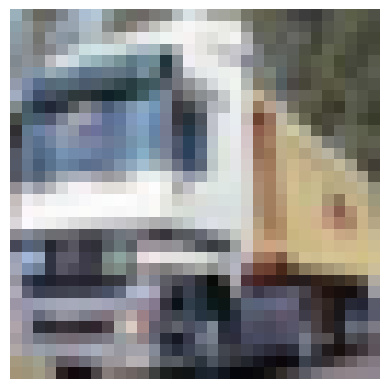

In [4]:
plt.imshow(x_train_full[1])
plt.axis('off')
plt.show()

In [5]:
y_train_full[1]

array([9], dtype=uint8)

# Build the Network

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                activation="elu",
                                kernel_initializer="he_normal"))

d:\Dev\Machine_Learning\tackleml\env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


What is He Normal Initialization?

A weight initialization used with ReLU and its variants. Helps avoid issues like vanishing or exploding gradrients during training, which leads to faster convergence and better performance.

In [7]:
model.add(keras.layers.Dense(10, activation="softmax"))

In [8]:
# Cross entropy loss function is an optimization function 
# which is used in case of training a classification model 
# which classifies the data by predicting the probability 
# of whether the data belongs to one class or the other class
loss_fn = keras.losses.SparseCategoricalCrossentropy()

In [9]:
optimizer = keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(loss=loss_fn, optimizer=optimizer, metrics=["accuracy"])

In [25]:
x_train = x_train_full[5000:]
y_train = y_train_full[5000:]
x_valid = x_train_full[:5000]
y_valid = y_train_full[:5000]

In [26]:
#output layer
model.add(keras.layers.Dense(10, activation="softmax"))

In [27]:
optimizer = keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(
    loss=loss_fn,
    optimizer=optimizer,
    metrics=["accuracy"]
)

In [28]:
checkpoint_filepath = "my_cifar10_model.keras"
model_logs_directory = "my_model_logs"
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, save_best_only=True)

run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, model_logs_directory + "/my_cifar10_logs", "run_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [29]:
model.fit(x_train, y_train, epochs=100,
          validation_data=(x_valid, y_valid),
          callbacks=callbacks)

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.0975 - loss: 2.3113 - val_accuracy: 0.0976 - val_loss: 2.3032
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.0975 - loss: 2.3010 - val_accuracy: 0.0976 - val_loss: 2.2912
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.0975 - loss: 2.2921 - val_accuracy: 0.0976 - val_loss: 2.2826
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.1595 - loss: 2.2829 - val_accuracy: 0.1832 - val_loss: 2.2753
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.1801 - loss: 2.2747 - val_accuracy: 0.2010 - val_loss: 2.2630
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.1848 - loss: 2.2642 - val_accuracy: 0.1878 - val_loss: 2.2517
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.1809 - loss: 2.2536 - val_accuracy: 0.1826 - val_loss: 2.2434
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.1864 - loss: 

# Functions for model code reuse

In [51]:
def create_callbacks(checkpoint_filepath, model_logs_directory):
    early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
    model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, save_best_only=True)
    run_index = 1 # increment every time you train the model
    run_logdir = os.path.join(os.curdir, model_logs_directory + "/my_cifar10_logs", "run_bn_{:03d}".format(run_index))
    tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
    callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]
    return callbacks

def evauluate_model(model, x_test, y_test):
    results = model.evaluate(x_test, y_test)
    print("test loss, test accuracy:", results)

In [31]:
model = keras.models.load_model(checkpoint_filepath)
evauluate_model(model=model, x_test=x_valid, y_test=y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2984 - loss: 1.8913
test loss, test accuracy: [1.8906466960906982, 0.29420000314712524]


This model sucks, lets optimize

In [52]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.BatchNormalization())
for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_initializer="he_normal"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation("elu"))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

checkpoint_filepath = "my_cifar10_bn_model.keras"
model_logs_directory = "my_model_logs"

callbacks = create_callbacks(checkpoint_filepath=checkpoint_filepath, model_logs_directory=model_logs_directory)

model.fit(x_train, y_train, epochs=100,
          validation_data=(x_valid, y_valid),
          callbacks=callbacks)

model = keras.models.load_model(checkpoint_filepath)
model.evaluate(x_valid, y_valid)

d:\Dev\Machine_Learning\tackleml\env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.2861 - loss: 1.9872 - val_accuracy: 0.4060 - val_loss: 1.6609
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3978 - loss: 1.6803 - val_accuracy: 0.4392 - val_loss: 1.5756
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4379 - loss: 1.5841 - val_accuracy: 0.4492 - val_loss: 1.5477
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4671 - loss: 1.5085 - val_accuracy: 0.4698 - val_loss: 1.5077
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4909 - loss: 1.4457 - val_accuracy: 0.4714 - val_loss: 1.5029
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.5121 - loss: 1.3896 - val_accuracy: 0.4814 - val_loss: 1.5002
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.5319 - loss: 1.3383 - val_accuracy: 0.4822 - val_loss: 1.5056
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.5501 -

[1.50016188621521, 0.4814000129699707]

In [37]:
evauluate_model(model=model, x_test=x_valid, y_test=y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4652 - loss: 1.5239
test loss, test accuracy: [1.516983151435852, 0.460999995470047]


In [53]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(learning_rate=7e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

checkpoint_filepath = "my_cifar10_selu_model.keras"
model_logs_directory = "my_model_logs"

callbacks = create_callbacks(checkpoint_filepath, model_logs_directory)

d:\Dev\Machine_Learning\tackleml\env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [54]:
X_means = x_train.mean(axis=0)
X_stds = x_train.std(axis=0)
X_train_scaled = (x_train - X_means) / X_stds
X_valid_scaled = (x_valid - X_means) / X_stds
X_test_scaled = (x_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model = keras.models.load_model(checkpoint_filepath)
model.evaluate(X_valid_scaled, y_valid)

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.2625 - loss: 2.0683 - val_accuracy: 0.3526 - val_loss: 1.8373
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3691 - loss: 1.7612 - val_accuracy: 0.4058 - val_loss: 1.6801
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4157 - loss: 1.6532 - val_accuracy: 0.4342 - val_loss: 1.6456
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4464 - loss: 1.5839 - val_accuracy: 0.4476 - val_loss: 1.6015
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4745 - loss: 1.5200 - val_accuracy: 0.4420 - val_loss: 1.5798
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4874 - loss: 1.4790 - val_accuracy: 0.4604 - val_loss: 1.5910
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5042 - loss: 1.4275 - val_accuracy: 0.4672 - val_loss: 1.5508
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5198 - loss: 

[1.522348165512085, 0.475600004196167]

In [55]:
evauluate_model(model=model, x_test=X_valid_scaled, y_test=y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4854 - loss: 1.5147
test loss, test accuracy: [1.522348165512085, 0.475600004196167]


In [56]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

checkpoint_filepath = "my_cifar10_alpha_dropout_model.keras"
model_logs_directory = "my_model_logs"

callbacks = create_callbacks(checkpoint_filepath, model_logs_directory)

d:\Dev\Machine_Learning\tackleml\env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [57]:
X_means = x_train.mean(axis=0)
X_stds = x_train.std(axis=0)
X_train_scaled = (x_train - X_means) / X_stds
X_valid_scaled = (x_valid - X_means) / X_stds
X_test_scaled = (x_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model = keras.models.load_model(checkpoint_filepath)

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.2591 - loss: 2.1060 - val_accuracy: 0.3786 - val_loss: 1.7801
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.3799 - loss: 1.7467 - val_accuracy: 0.4228 - val_loss: 1.6648
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4286 - loss: 1.6180 - val_accuracy: 0.4440 - val_loss: 1.6051
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4586 - loss: 1.5419 - val_accuracy: 0.4688 - val_loss: 1.5281
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4899 - loss: 1.4677 - val_accuracy: 0.4734 - val_loss: 1.5451
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5110 - loss: 1.4140 - val_accuracy: 0.4770 - val_loss: 1.5373
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5327 - loss: 1.3629 - val_accuracy: 0.4854 - val_loss: 1.5212
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5483 - loss: 

In [58]:
evauluate_model(model=model, x_test=X_valid_scaled, y_test=y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4838 - loss: 1.5302
test loss, test accuracy: [1.5211951732635498, 0.48539999127388]
